<a href="https://colab.research.google.com/github/beertocode/facerecognition/blob/master/famfacereco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=e62dcf6b23d00cb9fdd9d145e174f627f7cdf7c0d551e9af20ac47f67ea67639
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [2]:
mkdir known

In [3]:
mkdir unknown

In [5]:
ls known

'mom (7).jpg'  'srijan (5).jpg'  'sristy (1).jpg'


In [6]:
ls unknown

1.jpg  2.jpg  3.jpg  4.jpg


In [7]:

import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

In [8]:
#function to read and resize all images acc to ratio
def read_img(path):
  img=cv2.imread(path)
  (h, w)=img.shape[:2]
  width=500
  ratio=width/float(w)
  height=int(h*ratio)
  return cv2.resize(img,(width,height))

known_encodings=[]
known_names=[]
known_dir='known'

for file in os.listdir(known_dir):
  img=read_img(known_dir+'/'+file)
  #since we have only 1 face in a image we use onlt ine list element indexed 0
  img_enc=face_recognition.face_encodings(img)[0]
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])

known_encodings

[array([-1.24437787e-01,  1.58368543e-01,  7.93768093e-02, -2.17507929e-02,
        -1.06853977e-01,  3.71923298e-03, -1.81607902e-03, -9.67600793e-02,
         2.23160475e-01, -7.00271577e-02,  2.72382736e-01, -3.12879086e-02,
        -2.76802063e-01,  2.82195173e-02, -4.36132401e-03,  1.57529533e-01,
        -1.23396479e-01, -8.37112069e-02, -7.71516263e-02, -1.68848783e-04,
         1.07718647e-01, -9.58953425e-03,  2.23423950e-02,  4.36674245e-02,
        -6.34498969e-02, -3.89833391e-01, -8.78936425e-02, -7.87581354e-02,
        -8.32863990e-03, -8.00179094e-02, -6.97165821e-03,  3.13287824e-02,
        -1.95643693e-01, -4.33041789e-02,  5.65623119e-03,  4.41776263e-03,
        -6.02937825e-02, -7.16409013e-02,  1.94281742e-01, -3.92101109e-02,
        -2.46734560e-01, -4.96656299e-02,  1.01020783e-01,  2.07094431e-01,
         1.79478630e-01,  3.06099355e-02,  6.18473142e-02, -1.06104597e-01,
         6.00568466e-02, -2.09534347e-01, -3.66757158e-03,  1.75865635e-01,
         2.9

In [9]:
unknown_dir='unknown'
for file in os.listdir(unknown_dir):
  print("Processing",file)
  img=read_img(unknown_dir+'/'+file)
  img_enc=face_recognition.face_encodings(img)[0]
  #comparing unknown faces with known encodings
  #comapre faces takes known encodings and compare with unknown encodings 
  #and return a boolean array which is true if any of the unknown encodings matches with the known encodings
  results=face_recognition.compare_faces(known_encodings,img_enc)
  #to know whose image is matched we will use known names array
  for i in range (len(results)):
    if results[i]:
      print(known_names[i])
    
  #print(results)

Processing 1.jpg
mom (7)
Processing 4.jpg
Processing 3.jpg
srijan (5)
Processing 2.jpg
sristy (1)


In [10]:
#face distances method gives actual distance between the images
for file in os.listdir(unknown_dir):
  print("Processing",file)
  img=read_img(unknown_dir+'/'+file)
  img_enc=face_recognition.face_encodings(img)[0]
  #comparing unknown faces with known encodings
  #comapre faces takes known encodings and compare with unknown encodings 
  #and return a boolean array which is true if any of the unknown encodings matches with the known encodings
  results=face_recognition.compare_faces(known_encodings,img_enc)
  #to know whose image is more matched i.e at less distance
  print(face_recognition.face_distance(known_encodings,img_enc))

Processing 1.jpg
[0.3966441  0.70431345 0.67791857]
Processing 4.jpg
[0.78777562 0.74716156 0.64629532]
Processing 3.jpg
[0.65410771 0.63841641 0.36347309]
Processing 2.jpg
[0.68065306 0.39781478 0.63820433]


Processing 1.jpg


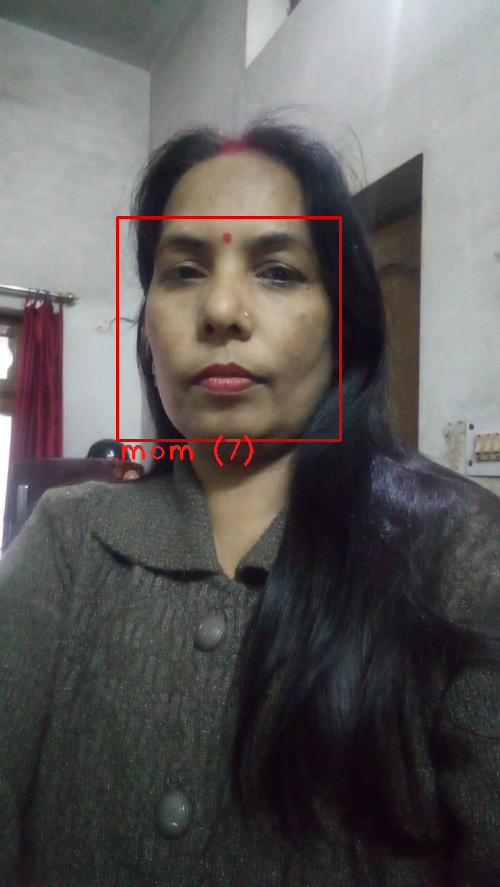

Processing 4.jpg
Processing 3.jpg


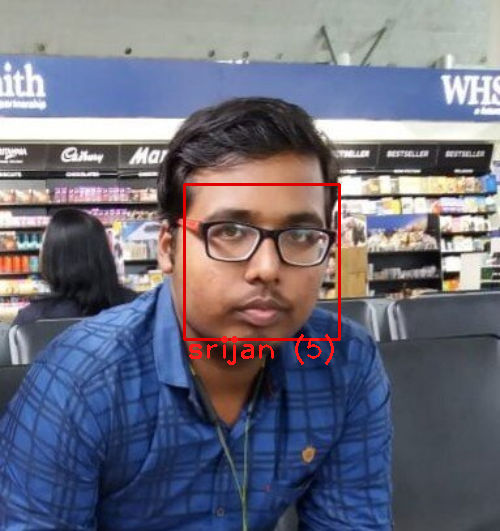

Processing 2.jpg


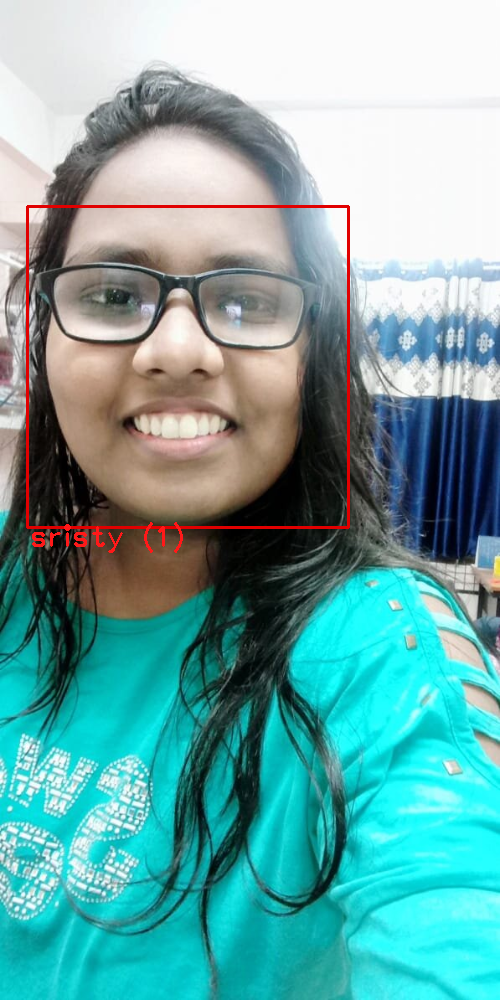

In [11]:
#using open cv  to draw on top of new image and write the name
for file in os.listdir(unknown_dir):
  print("Processing",file)
  img=read_img(unknown_dir+'/'+file)
  img_enc=face_recognition.face_encodings(img)[0]
  results=face_recognition.compare_faces(known_encodings,img_enc)
  #to know whose image is matched we will use known names array
  for i in range (len(results)):
    if results[i]:
      name=known_names[i]
      #face_locations returns coordinates of bounding box of each
      #face in the image
      (top,right,bottom,left)=face_recognition.face_locations(img)[0]
      #using these coordinates we draw a bounding box using cv2.rectangle
      cv2.rectangle(img,(left,top),(right,bottom),(0,0,225),2)
      #writing name on box
      cv2.putText(img,name,(left+2,bottom+20),cv2.FONT_HERSHEY_PLAIN,2,(25,25,255),2)
      cv2_imshow(img)  #for google colab